# Testes de hipótese
Este notebook é responsável por realizar testes de hipóteses sobre o dataset, para comparar valores de categorias.

In [2]:
from Utils import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
pd.set_option('display.max_colwidth', 100)
DATASET = "../datasets/clean_vehicles_2.csv"
df = pd.read_csv(DATASET)

,price,year,odometer,lat,long
count,3.969010e+05,396901.000000,3.969010e+05,396901.000000,396901.000000
mean,3.432897e+04,2010.258528,9.345143e+04,38.514338,-94.976967
std,6.346648e+06,8.667275,1.106876e+05,5.920743,18.126894
min,0.000000e+00,1900.000000,-1.000000e+00,-83.197100,-177.012000
25%,4.999000e+03,2007.000000,3.994600e+04,34.549400,-111.925000
50%,1.049500e+04,2012.000000,8.700000e+04,38.996600,-89.448400
75%,1.799900e+04,2016.000000,1.320000e+05,42.512500,-81.324400
max,2.490531e+09,2021.000000,1.000000e+07,78.473300,139.388000


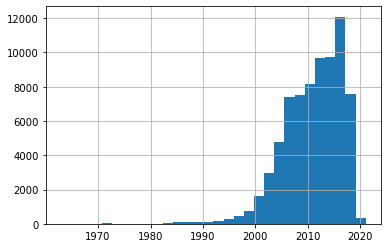

In [40]:
#Verificar se a distribuição do ano de fabricação segue uma distribuição gaussiana.
#Por enquanto, verificando apenas com o subconjunto de fabricantes japonesas
filter_list = ['toyota','nissan','honda']

toyota = df[df['manufacturer'].isin(['toyota'])][['price', 'year','odometer']]
nissan = df[df['manufacturer'].isin(['nissan'])][['price', 'year','odometer']]
honda = df[df['manufacturer'].isin(['honda'])][['price', 'year','odometer']]
df[df['manufacturer'].isin(filter_list)]['year'].hist(bins = 30)

In [26]:
#Podemos observar que o gráfico não parece uma distribuição normal.
#Executando o teste de normalidade Shapiro-Wilk. Hipótese nula: a população é normalmente distribuída.
#adotando uma significancia de 5%
stats.shapiro(df[df['manufacturer'].isin(filter_list)]['year'])

#Logo, como p-value < 0,05, eu rejeito a hipótese nula, concluindo que a distribuição dos anos de fabricação anunciados não é normal.

ShapiroResult(statistic=0.9285131692886353, pvalue=0.0)

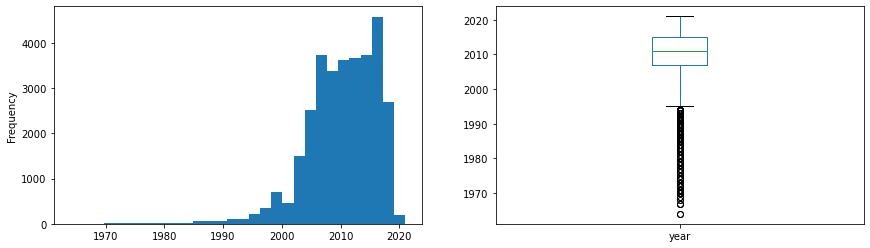

In [62]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
toyota['year'].plot.hist(ax=axs[0], bins = 30)
toyota['year'].plot(kind='box',ax=axs[1])

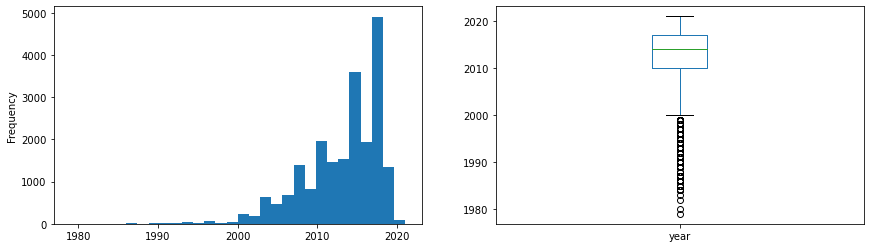

In [63]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
nissan['year'].plot.hist(ax=axs[0], bins = 30)
nissan['year'].plot(kind='box',ax=axs[1])

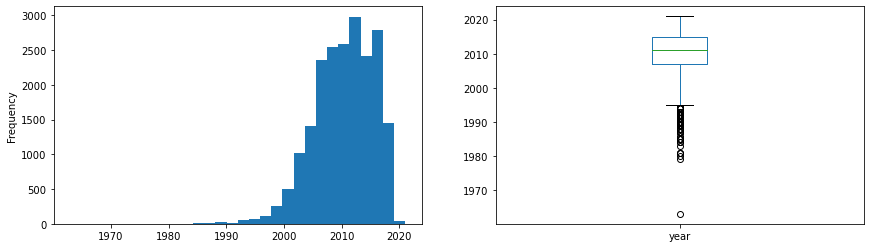

In [64]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(right=2)
honda['year'].plot.hist(ax=axs[0], bins = 30)
honda['year'].plot(kind='box',ax=axs[1])

In [74]:
#Queremos perceber se há relação entre a quantidade de anuncios de  Hondas e Toyotas de mesmo ano de fabricação
#Como estas grandezas não são relacionadas (Pairadas), usaremos teste de Mann Whitneyu
#A Hipótese nula é que as distrubuições são estatisticamente iguais.
#Considerando uma significância de 5% (O.05)

result, pvalue = stats.mannwhitneyu(honda['year'],toyota['year'])

#Caso pvalue > 0.05 então o teste falho em rejeitar a hipotese nula
#Caso pvalue < 0.05 a hipotese nula será rejeitada.

if(pvalue > 0.05):
    print("As amostras são estatisticamente iguais")
else:
    print("As amostras não são estatisticamente iguais")


As amostras são estatisticamente iguais


In [76]:
#Agora, queremos perceber se há relação entre a quantidade de anuncios de  Nissan e Toyotas de mesmo ano de fabricação
#A Hipótese nula é que as distrubuições são estatisticamente iguais.
#Considerando uma significância de 5% (O.05)

result, pvalue = stats.mannwhitneyu(nissan['year'],toyota['year'])

if(pvalue > 0.05):
    print("As amostras são estatisticamente iguais")
else:
    print("As amostras não são estatisticamente iguais")

As amostras não são estatisticamente iguais
